## Importing required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# Dataset loading 
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# printing column names
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
# Checking unique values
print(df['enginetype'].unique())
print(df['enginelocation'].unique())

['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['front' 'rear']


In [6]:
# Checking null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# Checking shape of dataset
df.shape


(205, 26)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Data Preprocessing

In [13]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])

# Droping CarName
df.drop(['CarName'], axis=1, inplace=True)

# Droping Car id
df.drop(['car_ID'], axis=1, inplace=True)

df.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
# Checking unique values in company name
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [17]:
# Correcting company names
df = df.replace(to_replace = 'maxda', value='mazda')
df = df.replace(to_replace = 'porcshce', value='porsche')
df = df.replace(to_replace = 'toyouta', value = 'toyota')
df = df.replace(to_replace = 'vokswagen', value = 'volkswagen')
df = df.replace(to_replace = 'vw', value = 'volkswagen')
df = df.replace(to_replace = 'Nissan', value = 'nissan')

In [18]:
# Again checking unique names in CompanyName
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### EDA

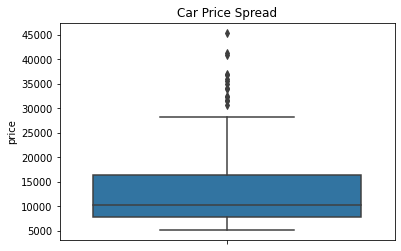

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [20]:
# Visualization of price
# boxplot
plt.title('Car Price Spread')
sns.boxplot(y=df.price)
plt.show()
print(df.price.describe())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


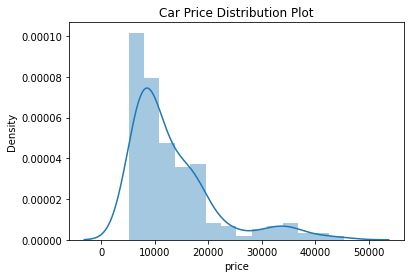

In [22]:
# Plotting distribution plot
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)
plt.show()

In [23]:
print(df.price.describe())

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [24]:
# Defining function for visualization
import scipy
from scipy.stats.stats import pearsonr

def pairplot(x_axis, y_axis):
  sns.pairplot(df,x_vars=x_axis, y_vars=y_axis, height=4, aspect=1, kind='scatter')
  plt.show()

In [25]:
y_vars = ['price']

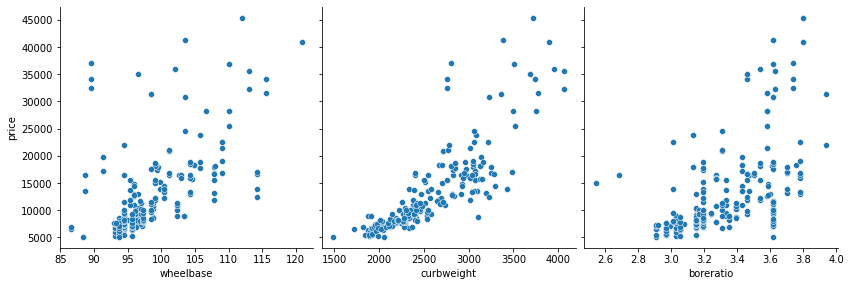


Coefficient of Correlation between Price and wheelbase: 57.78155982921501 %
Correlation coefficient between Price and curbweight: 83.53048793372967 %
Correlation coefficient between Price and boreratio:  55.317323679844364 %


In [27]:
# Plotting Price vs Wheelbase, Price vs curbweight and Price vs boreratio
x_vars = ['wheelbase','curbweight','boreratio']
pairplot(x_vars, y_vars)

p1=df['wheelbase']
p2=df['curbweight']
p3=df['boreratio']

pearson_coeff, p_value = pearsonr(p1,df['price'])
print('\nCoefficient of Correlation between Price and wheelbase:',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,df['price'])
print('Correlation coefficient between Price and curbweight:',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,df['price'])
print('Correlation coefficient between Price and boreratio: ',pearson_coeff*100,'%')

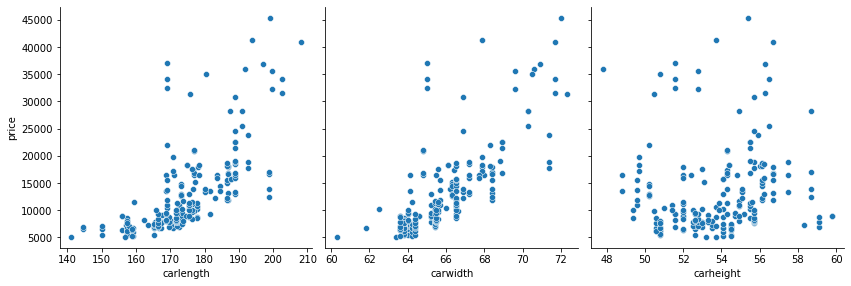


Correlation coefficient between Price and carlength: 68.2920015677962 %
Correlation coefficient between Price and carwidth:  75.93252997415115 %
Correlation coefficient between Price and carheight:  11.933622657049444 %


In [29]:
# Plotting Price vs carlength, Price vs carwidth, Price vs carheight
x_vars=['carlength','carwidth', 'carheight']
pairplot(x_vars,y_vars)

p1=df['carlength']
p2=df['carwidth']
p3=df['carheight']

pearson_coeff, p_value = pearsonr(p1,df['price'])
print('\nCorrelation coefficient between Price and carlength:',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,df['price'])
print('Correlation coefficient between Price and carwidth: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,df['price'])
print('Correlation coefficient between Price and carheight: ',pearson_coeff*100,'%')

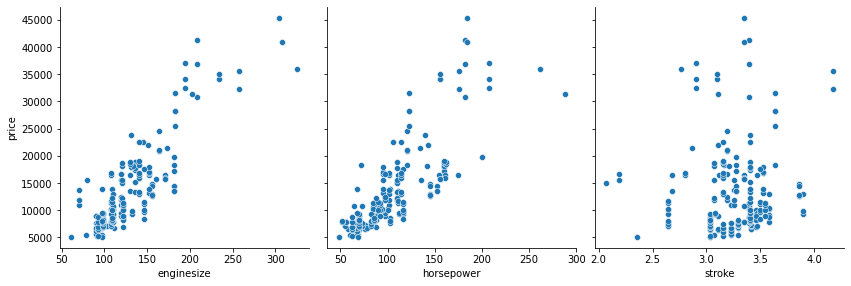


Correlation coefficient between Price and enginesize:  87.41448025245117 %
Correlation coefficient between Price and horsepower:  80.81388225362215 %
Correlation coefficient between Price and stroke:  7.9443083881931 %


In [31]:
# Plotting Price vs Enginesize , Price vs horsepower, Price vs Stroke
x_vars=['enginesize','horsepower','stroke']
pairplot(x_vars,y_vars)

p1=df['enginesize']
p2=df['horsepower']
p3=df['stroke']

pearson_coeff, p_value = pearsonr(p1,df['price'])
print('\nCorrelation coefficient between Price and enginesize: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,df['price'])
print('Correlation coefficient between Price and horsepower: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,df['price'])
print('Correlation coefficient between Price and stroke: ',pearson_coeff*100,'%')

In [32]:
# Drop some columns
df = df.drop(['carheight' ,'stroke' ,'compressionratio' ,'peakrpm' ,'carlength' ,'carwidth' ,'curbweight' ,'enginesize' ,'highwaympg'], axis=1)

In [33]:
# Converting string into numbers using dummy variable
def binary_dummy_replace(x) :
     return x.map({"gas":1,"diesel":0,
                   "std":1,"turbo":0,
                   "two":1, "four":0,
                   "front": 1, "rear": 0})
def dummies(x,df):  
    temp = pd.get_dummies(df[x], prefix=x, drop_first = True)
    
    #l = temp.columns.values
    #for nm in l:
        #newt=x+"_"+nm
        #temp.rename({nm: Replace_Name(x)+"_"+nm}, axis=1, inplace=True)
        
    #print(temp.columns.values)
        
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [34]:
df = dummies('symboling',df)
df = dummies('CompanyName',df)
df = dummies('fueltype',df)
df = dummies('aspiration',df)
df = dummies('doornumber',df)
df = dummies('carbody',df)
df = dummies('drivewheel',df)
df = dummies('enginelocation',df)
df = dummies('enginetype',df)
df = dummies('cylindernumber',df)
df = dummies('fuelsystem',df)

In [35]:
df.head()

,wheelbase,boreratio,horsepower,citympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,3.47,111,21,13495.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,88.6,3.47,111,21,16500.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,94.5,2.68,154,19,16500.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,99.8,3.19,102,24,13950.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,99.4,3.19,115,18,17450.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
# Train and Test split
train, test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=0)

In [39]:
# Feature scaling
from sklearn.preprocessing import StandardScaler,scale
sc = StandardScaler()

col_to_scale = ['wheelbase', 'boreratio', 'horsepower','citympg','price']

train[col_to_scale] = sc.fit_transform(train[col_to_scale])
test[col_to_scale] = sc.fit_transform(test[col_to_scale])

train.head()

,wheelbase,boreratio,horsepower,citympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
40,-0.400606,-0.725182,-0.474581,0.330772,-0.380330,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,-0.031842,0.181824,-0.527272,0.163633,-0.608172,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
56,-0.593005,-0.044927,-0.079404,-1.340619,-0.184132,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
101,0.224689,0.332992,1.264199,-1.340619,0.025230,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
86,-0.432672,0.030656,-0.421891,-0.003506,-0.646905,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
# Training data
y_train = train.loc[:,train.columns == 'price']
X_train = train.loc[:, train.columns != 'price']

In [41]:
# Test data
y_test = test.loc[:,test.columns == 'price']
X_test = test.loc[:, test.columns != 'price']

### Training the model

In [42]:
import statsmodels.api as sm 

lm = sm.OLS(y_train,X_train).fit()

y_pred=lm.predict(X_test)

### Evaluation

In [43]:
resid = y_test - y_pred.to_frame('price')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


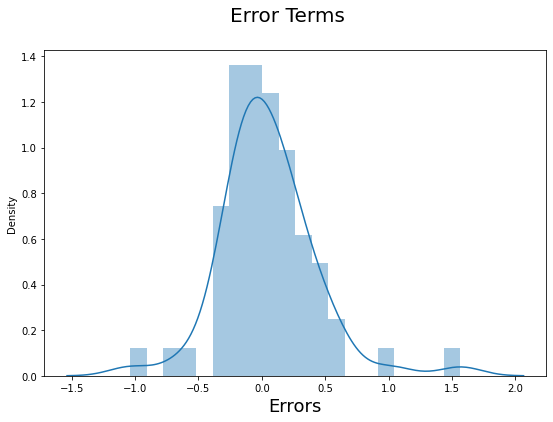

In [44]:
fig = plt.figure(figsize=(9,6))
sns.distplot(resid, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)
plt.show()

**Analysis:** The error terms are distributed around zero, which means that the prediction of the model is not random.

Text(0, 0.5, 'Residuals')

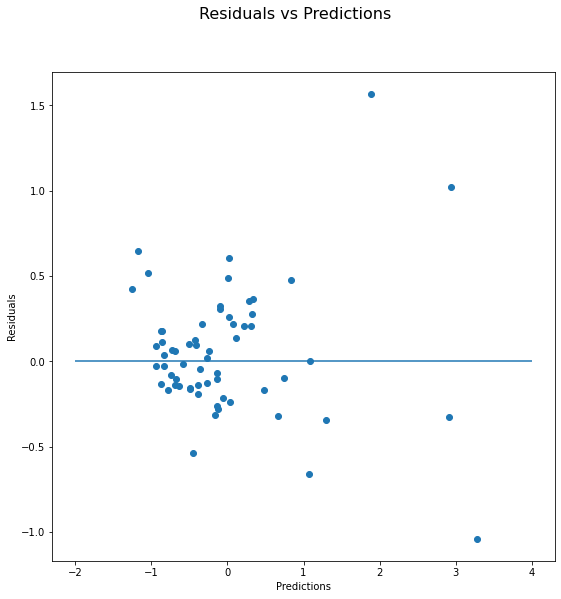

In [45]:
plt.figure(figsize=(9,9))
plt.scatter(y_pred, resid)
plt.hlines(0,-2,4)
plt.suptitle('Residuals vs Predictions', fontsize=16)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

**Analysis:** We can see that the values are ** evenly distributed ** around 0, with only a few ** outliers **.